In [35]:
%matplotlib inline

In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from patsy import dmatrices
from sklearn import metrics
from statsmodels.stats.outliers_influence import OLSInfluence
import seaborn as sns
import matplotlib.pyplot as plt

Użyj biblioteki statsmodels do wykonania regresji liniowej z mpg jako zmienną objaśnianą, a horsepower jako predyktorem (np. metoda OLS). Wyjaśnij informacje
zwracane przez metodę model.summary(), w szczególności: przedziały ufności, pvalues, T-statistic, F-statistic i R2
. Możesz się wzorować na tej analizie w Jupyter
notebook.

In [37]:
auto = pd.read_csv('Auto.csv')
auto['origin'] = auto['origin'].astype('category')
auto['horsepower'] = pd.to_numeric(auto['horsepower'], errors='coerce')
auto['weight'] = pd.to_numeric(auto['weight'], errors='coerce')
auto["cylinders"] = pd.to_numeric(auto["cylinders"], errors="coerce")

auto.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [38]:
# Look for null values
print(auto.isnull().sum())

# Drop rows with null values
auto = auto.dropna()

# verify that there are no null values
print(auto.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [39]:
def myLinReg(model_formula, df, printMSE = False):
    """
    Function returns the summary for fitted linear model.
    
    Parameter "model_formula" should be a patsy formula describing the model.
    Parameter "df" is a dataframe.
    """
    
    # Split the data into training (80%) and validation set (20%)
    mask = np.random.rand(len(df)) < 0.8
    train = df[mask]
    valid = df[~mask]
        
    # Prepare the data (dmatrices is from patsy library)
    y_train, X_train = dmatrices(model_formula, data=train, return_type='dataframe')   
    y_valid, X_valid = dmatrices(model_formula, data=valid, return_type='dataframe')

    # Train the model
    model = sm.OLS(y_train, X_train) 
    result = model.fit() 

    
    

    if(printMSE==True):
        print(model_formula)

        # Show MSE for training set
        y_train_pred = result.predict(X_train)
        print(f'MSE_Train: {metrics.mean_squared_error(y_train, y_train_pred)}')

        # Show MSE for validation set
        y_valid_pred = result.predict(X_valid)
        print(f'MSE_Test: {metrics.mean_squared_error(y_valid, y_valid_pred)}\n')

    # Retrun fitted model summary
    return result

In [40]:
result = myLinReg('mpg ~ horsepower', auto)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     468.3
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           7.05e-65
Time:                        11:31:37   Log-Likelihood:                -985.05
No. Observations:                 326   AIC:                             1974.
Df Residuals:                     324   BIC:                             1982.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.6622      0.789     50.286      0.000      38.111      41.214
horsepower    -0.1547      0.007    -21.640      0.000      -0.169      -0.141
==============================================================================
Omnibus:                       12.057   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.338
Skew:                           0.460   Prob(JB):                      0.00209
Kurtosis:                       3.246   Cond. No.                         315.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Utwórz macierz wykresów punktowych (ang. scatterplot matrix), dla wszystkich
zmiennych w zbiorze danych. Możesz użyć pandas.plotting.scatter_matrix(...).
Oblicz macierz korelacji między zmiennymi. Możesz użyć funkcji corr() dla DataFrame z biblioteki pandas.

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.000000  0.290316  0.212746  

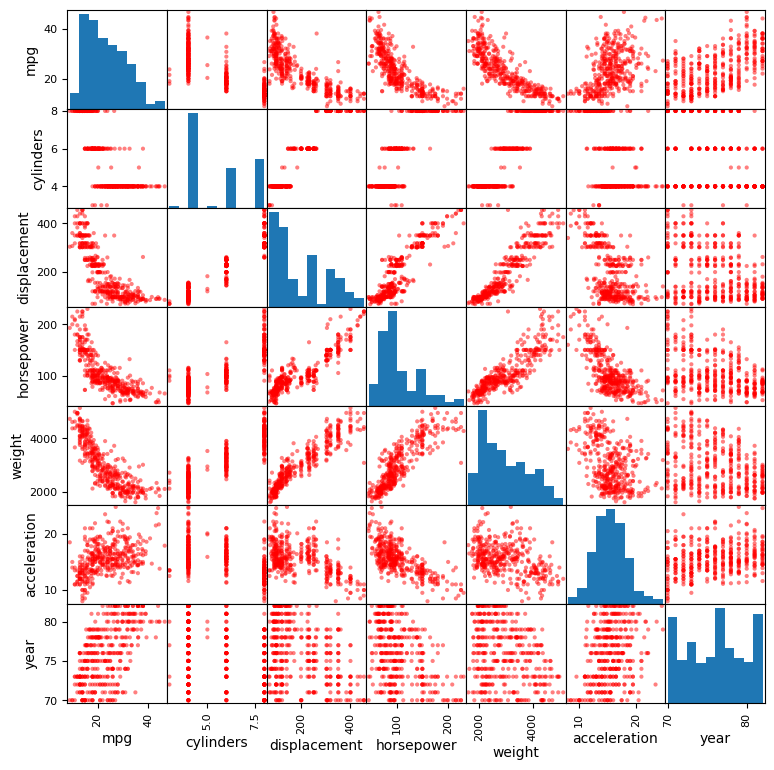

In [41]:
df_auto = auto[['mpg', 'cylinders', 'displacement', 'horsepower','weight','acceleration','year','origin']] 

print(df_auto.corr())
plt.close()
pd.plotting.scatter_matrix(auto,color="red",figsize=(9,9))
plt.show()

In [42]:
models = ['mpg ~ horsepower + weight + acceleration + year + displacement + cylinders + origin',
          'mpg ~ I(np.log(horsepower)) + weight + acceleration + year + displacement + cylinders + origin',
          'mpg ~ horsepower + I(np.sqrt(weight)) + acceleration + year + displacement + cylinders + origin',
          'mpg ~ horsepower * weight + acceleration + year + displacement + cylinders + origin',
          'mpg ~ horsepower * year + weight + acceleration + displacement + cylinders + origin',
          'mpg ~ horsepower * weight + I(np.log(acceleration)) + I(np.sqrt(displacement)) + cylinders + origin',]


Przeprowadź regresję liniową z mpg jako zmienną objaśnianą i wszystkimi innymi
zmiennymi (z wyjątkiem name) jako predyktorami. Spróbuj zdefiniować różne modele
wykorzystując biblioteką patsy i używając symboli +, *, : oraz różnych transformacji
zmiennych, takich jak na przykład I(np.log(X)) lub I(np.sqrt(X)). Co to jest błąd
generalizacji? Dla którego modelu uzyskujesz najlepszy błąd generalizacji?


In [43]:
result = myLinReg(models[0], auto, printMSE=True)
result.summary()

mpg ~ horsepower + weight + acceleration + year + displacement + cylinders + origin
MSE_Train: 10.475756819571611
MSE_Test: 11.929033128112893



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     169.8
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          4.93e-106
Time:                        11:31:39   Log-Likelihood:                -793.60
No. Observations:                 306   AIC:                             1605.
Df Residuals:                     297   BIC:                             1639.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -13.8142      5.241     -2.636      0.009     -24.127      -3.501
origin[T.2]      2.3866      0.647      3.691      0.000       1.114       3.659
origin[T.3]      3.1002      0.622      4.988      0.000       1.877       4.324
horsepower      -0.0250      0.016     -1.599      0.111      -0.056       0.006
weight          -0.0072      0.001     -9.058      0.000      -0.009      -0.006
acceleration     0.0443      0.114      0.389      0.697      -0.180       0.268
year             0.7463      0.058     12.848      0.000       0.632       0.861
displacement     0.0331      0.009      3.744      0.000       0.016       0.051
cylinders       -0.6690      0.360     -1.857      0.064      -1.378       0.040
==============================================================================
Omnibus:                       27.867   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.343
Skew:                           0.537   Prob(JB):                     1.93e-11
Kurtosis:                       4.648   Cond. No.                     8.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
result = myLinReg(models[1], auto, printMSE=True)
result.summary()

mpg ~ I(np.log(horsepower)) + weight + acceleration + year + displacement + cylinders + origin
MSE_Train: 9.003630153233143
MSE_Test: 13.549190910585361



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     212.9
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          7.42e-121
Time:                        11:31:39   Log-Likelihood:                -800.65
No. Observations:                 318   AIC:                             1619.
Df Residuals:                     309   BIC:                             1653.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                28.9926      9.440      3.071      0.002      10.417      47.568
origin[T.2]               2.2858      0.584      3.911      0.000       1.136       3.436
origin[T.3]               3.1396      0.560      5.607      0.000       2.038       4.241
I(np.log(horsepower))    -9.9819      1.723     -5.792      0.000     -13.373      -6.591
weight                   -0.0048      0.001     -5.782      0.000      -0.006      -0.003
acceleration             -0.2658      0.113     -2.358      0.019      -0.488      -0.044
year                      0.7218      0.053     13.677      0.000       0.618       0.826
displacement              0.0280      0.008      3.545      0.000       0.012       0.043
cylinders                -0.4828      0.323     -1.493      0.136      -1.119       0.153
==============================================================================
Omnibus:                       35.499   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.993
Skew:                           0.711   Prob(JB):                     1.89e-12
Kurtosis:                       4.434   Cond. No.                     1.75e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
result = myLinReg(models[2], auto, printMSE=True)
result.summary()
    

mpg ~ horsepower + I(np.sqrt(weight)) + acceleration + year + displacement + cylinders + origin
MSE_Train: 9.54414724774022
MSE_Test: 11.372237937601676



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     199.8
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          7.25e-114
Time:                        11:31:39   Log-Likelihood:                -769.16
No. Observations:                 302   AIC:                             1556.
Df Residuals:                     293   BIC:                             1590.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.5271      5.044      0.303      0.762      -8.400      11.454
origin[T.2]            2.8408      0.610      4.660      0.000       1.641       4.041
origin[T.3]            1.7655      0.625      2.825      0.005       0.536       2.995
horsepower            -0.0077      0.015     -0.517      0.606      -0.037       0.022
I(np.sqrt(weight))    -0.8986      0.080    -11.265      0.000      -1.056      -0.742
acceleration           0.1465      0.110      1.332      0.184      -0.070       0.363
year                   0.8463      0.056     15.119      0.000       0.736       0.956
displacement           0.0282      0.008      3.408      0.001       0.012       0.044
cylinders             -0.2572      0.355     -0.726      0.469      -0.955       0.441
==============================================================================
Omnibus:                       23.688   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.274
Skew:                           0.489   Prob(JB):                     2.96e-09
Kurtosis:                       4.471   Cond. No.                     7.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
result = myLinReg(models[3], auto, printMSE=True)
result.summary()

mpg ~ horsepower * weight + acceleration + year + displacement + cylinders + origin
MSE_Train: 7.9446566472740905
MSE_Test: 10.231963617795621



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     223.4
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          1.46e-130
Time:                        11:31:39   Log-Likelihood:                -793.03
No. Observations:                 323   AIC:                             1606.
Df Residuals:                     313   BIC:                             1644.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.6388      5.011      0.327      0.744      -8.220      11.498
origin[T.2]           1.6002      0.548      2.920      0.004       0.522       2.678
origin[T.3]           1.6687      0.536      3.115      0.002       0.615       2.723
horsepower           -0.2203      0.025     -8.648      0.000      -0.270      -0.170
weight               -0.0115      0.001    -14.564      0.000      -0.013      -0.010
horsepower:weight  5.253e-05   5.75e-06      9.142      0.000    4.12e-05    6.38e-05
acceleration         -0.0664      0.097     -0.681      0.496      -0.258       0.125
year                  0.7752      0.050     15.561      0.000       0.677       0.873
displacement          0.0092      0.008      1.211      0.227      -0.006       0.024
cylinders             0.1625      0.316      0.515      0.607      -0.459       0.784
==============================================================================
Omnibus:                       35.770   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.417
Skew:                           0.599   Prob(JB):                     1.88e-16
Kurtosis:                       4.986   Cond. No.                     1.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
result = myLinReg(models[4], auto, printMSE=True)
result.summary()

mpg ~ horsepower * year + weight + acceleration + displacement + cylinders + origin
MSE_Train: 9.085658998923059
MSE_Test: 8.340413699163305



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     200.2
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          1.72e-123
Time:                        11:31:39   Log-Likelihood:                -807.13
No. Observations:                 320   AIC:                             1634.
Df Residuals:                     310   BIC:                             1672.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -97.2186     11.260     -8.634      0.000    -119.375     -75.062
origin[T.2]         2.7977      0.579      4.835      0.000       1.659       3.936
origin[T.3]         2.3576      0.570      4.137      0.000       1.236       3.479
horsepower          0.7554      0.105      7.226      0.000       0.550       0.961
year                1.8180      0.147     12.356      0.000       1.529       2.108
horsepower:year    -0.0106      0.001     -7.390      0.000      -0.013      -0.008
weight             -0.0057      0.001     -8.457      0.000      -0.007      -0.004
acceleration        0.0587      0.101      0.582      0.561      -0.140       0.257
displacement        0.0133      0.008      1.683      0.093      -0.002       0.029
cylinders          -0.1226      0.327     -0.375      0.708      -0.766       0.521
==============================================================================
Omnibus:                        7.505   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                8.796
Skew:                           0.237   Prob(JB):                       0.0123
Kurtosis:                       3.660   Cond. No.                     5.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
result = myLinReg(models[5], auto, printMSE=True)
result.summary()

mpg ~ horsepower * weight + I(np.log(acceleration)) + I(np.sqrt(displacement)) + cylinders + origin
MSE_Train: 13.995525130901509
MSE_Test: 19.663761471479862



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     132.4
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.54e-95
Time:                        11:31:39   Log-Likelihood:                -879.00
No. Observations:                 321   AIC:                             1776.
Df Residuals:                     312   BIC:                             1810.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   89.6518      7.465     12.009      0.000      74.963     104.341
origin[T.2]                 -0.6514      0.755     -0.863      0.389      -2.137       0.834
origin[T.3]                  1.5734      0.725      2.169      0.031       0.146       3.001
horsepower                  -0.2992      0.037     -8.181      0.000      -0.371      -0.227
weight                      -0.0072      0.001     -6.030      0.000      -0.010      -0.005
horsepower:weight         5.524e-05   7.56e-06      7.309      0.000    4.04e-05    7.01e-05
I(np.log(acceleration))     -8.7001      2.179     -3.993      0.000     -12.987      -4.413
I(np.sqrt(displacement))    -0.5581      0.313     -1.780      0.076      -1.175       0.059
cylinders                   -0.2412      0.429     -0.563      0.574      -1.085       0.602
==============================================================================
Omnibus:                       59.596   Durbin-Watson:                   1.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.847
Skew:                           0.966   Prob(JB):                     5.73e-27
Kurtosis:                       5.302   Cond. No.                     1.46e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

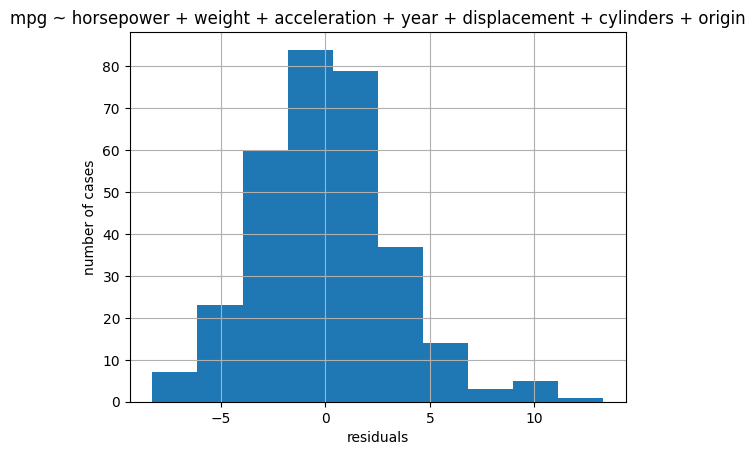

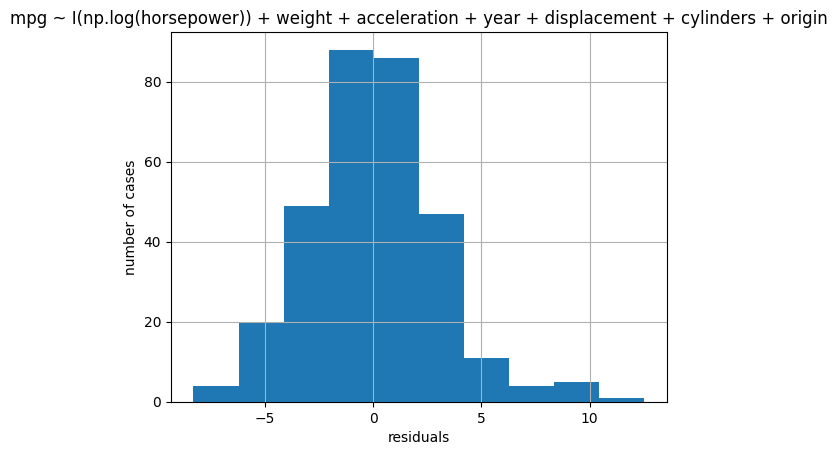

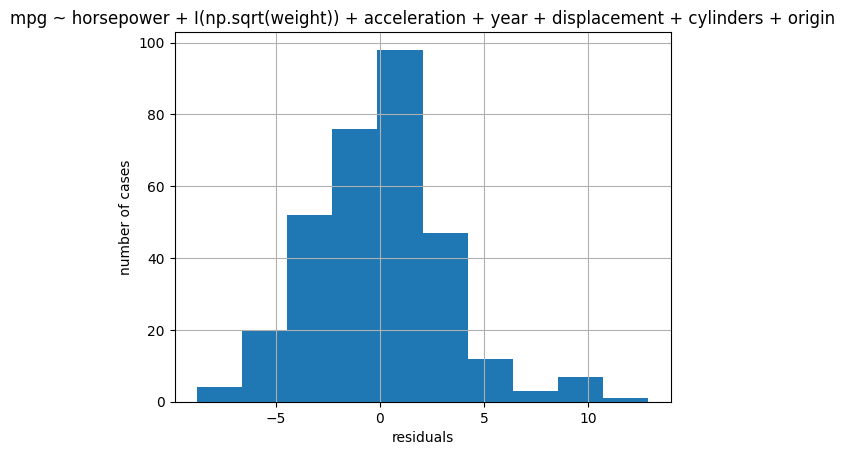

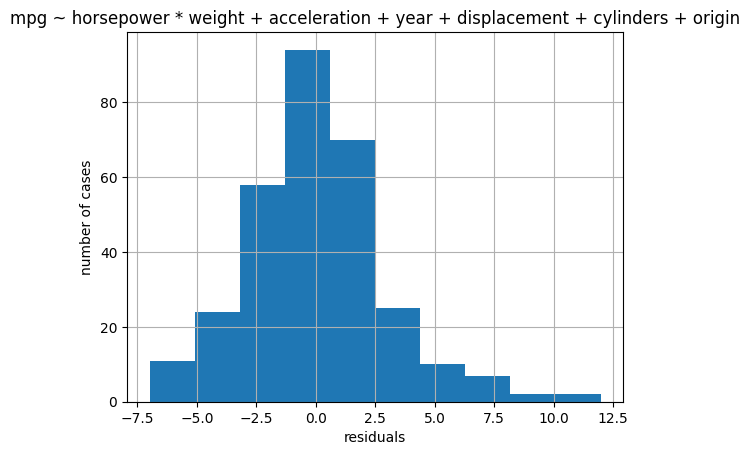

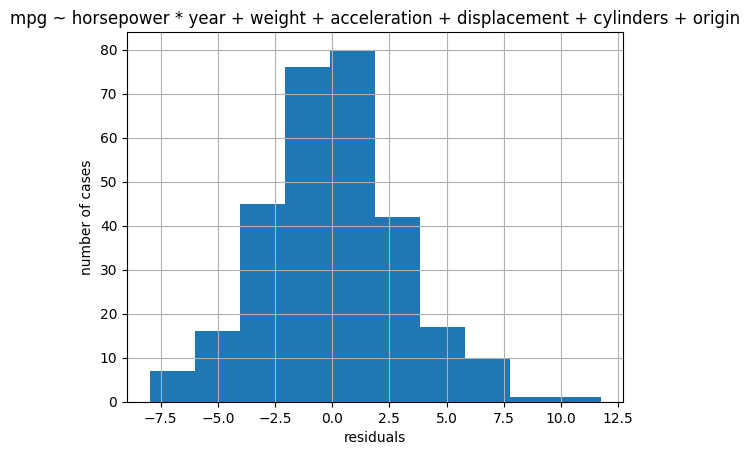

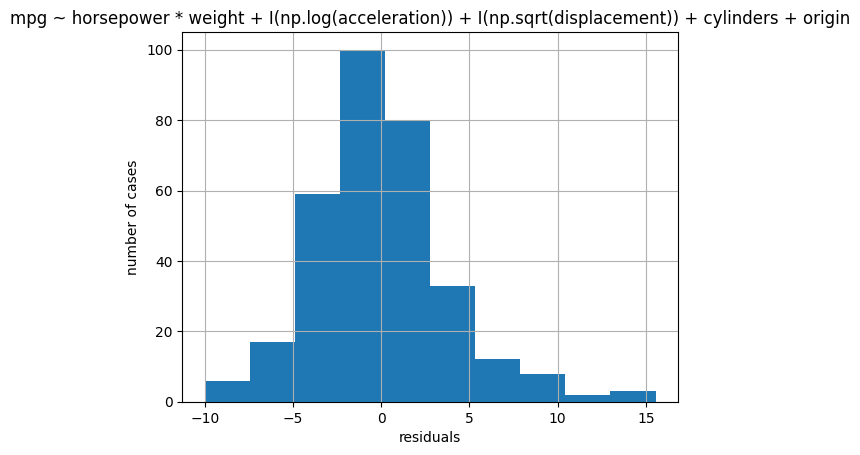

In [49]:
# Verify that residuals follow normal distribiution and look for outliers
plt.close()
for model in models:
    ax = myLinReg(model,auto).resid.hist()  
    ax.set_xlabel("residuals")
    ax.set_ylabel("number of cases")
    ax.set_title(model)
    plt.show()
    plt.close()





mpg ~ horsepower * weight + acceleration + year + displacement + cylinders + origin
MSE_Train: 8.08754497945893
MSE_Test: 9.854859555015546

13     1.226447
333    0.539523
393    0.505924
326    0.461364
386    0.447705
Name: Leverage, dtype: float64


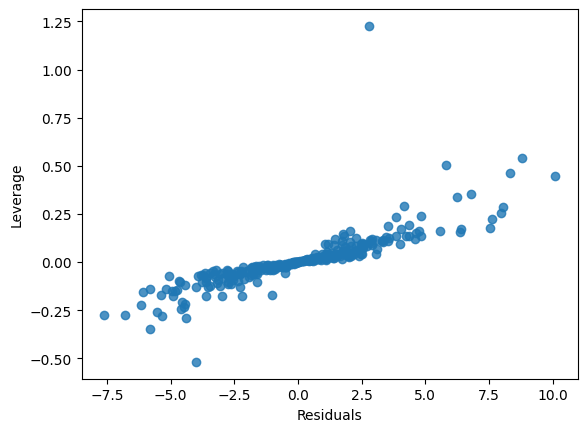

In [50]:
# Look for high leverage points that you might want to remove

result = myLinReg(models[3], auto, printMSE=True)
residuals = pd.Series(result.resid, name="Residuals")
leverage = pd.Series(OLSInfluence(result).influence, name = "Leverage")
_ = sns.regplot(x=residuals, y=leverage, fit_reg=False)

print(leverage.sort_values(ascending=False).head())
plt.show()
plt.close()

In [ ]:
indexs = leverage.sort_values(ascending=False).head(3).index

print(indexs)
print(auto.loc[indexs])

auto_droped = auto.drop(indexs)

result = myLinReg(models[3], auto_droped, printMSE=True)


Index([13, 333, 393], dtype='int64')
      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
13   14.0          8         455.0       225.0    3086          10.0    70   
333  32.7          6         168.0       132.0    2910          11.4    80   
393  44.0          4          97.0        52.0    2130          24.6    82   

    origin                     name  
13       1  buick estate wagon (sw)  
333      3            datsun 280-zx  
393      2                vw pickup  
mpg ~ horsepower * weight + acceleration + year + displacement + cylinders + origin
MSE_Train: 7.81127616474256
MSE_Test: 9.405585208024018

